In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Import Dataset

df = pd.read_csv('CarPricePrediction.csv')

In [3]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
#clean data and check for missiing or null values
df.fillna(method ='ffill', inplace = True)

In [11]:
#Defining Independent and Dependent Variables

x=df.drop(['price'],axis=1).values
y=df['price'].values

In [12]:
#Check independent Variables are correct

print(x)

[[  88.6  168.8   64.1 ... 5000.    21.    27. ]
 [  88.6  168.8   64.1 ... 5000.    21.    27. ]
 [  94.5  171.2   65.5 ... 5000.    19.    26. ]
 ...
 [ 109.1  188.8   68.9 ... 5500.    18.    23. ]
 [ 109.1  188.8   68.9 ... 4800.    26.    27. ]
 [ 109.1  188.8   68.9 ... 5400.    19.    25. ]]


In [13]:
#Check dependent Variable
print(y)

[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.    25552.    28248.    28176.
 31600.    34184.    35056.    40960.    45400.    16503.     5389.
  6189.     6669.     7689.     9959.     8499.    12629.    14869.
 14489.     6989.     8189.     9279.     9279.     5499.     7099.
  6649.     6849.     7349.     7299.     7799.     7499.     7999.
  8249.     8949.     9549.    13499.    14399. 

In [38]:
#Dataset split into training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state = 0)

In [39]:
# model trained on training set

ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [40]:
#predicting the Test set results
y_pred=ml.predict(x_test)
print(y_pred)

[ 6232.94806782 19810.20285387 14890.44164765 -1011.4618714
 11119.66457211 13588.85095819  5776.14075816  5979.48231192
 23436.1052571   8262.19837645 16063.63187428 38422.02216494
  9471.9373867  14417.23340769  5880.47713631 13215.49511544
 11055.15727344 18649.73792663 10133.62265825  6268.75809477
 10749.27788463 18020.71950848 10848.32537477 13690.94044644
 21597.70257333  8278.2661912   6852.90472085 17749.35528066
  6832.4621927   5681.49103049  9602.03452898 10989.44024056
 21521.14864675  8260.0612671   5824.41631404 26711.79277383
 10331.37853798 16888.09307712  6728.02929033 37124.11788258
  5778.38764806 15529.49745768 30431.64479226 17682.62715594
 11525.0306786   7208.5197719   7036.20505728 15640.95699341
 10205.45957458  9794.5461354  18940.67073878  6863.71034647
  5815.15323537  9770.09590652 19472.49277494 23444.29987406
 12441.64471522 17130.77020695]


In [41]:
#Running a prediction test on initial dataset to show fit

ml.predict([[88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27]])

array([13398.54001939])

In [42]:
#Evalauting model for accuracy and correlation

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8284226007102243

Text(0.5, 1.0, 'Actual VS. Predicted')

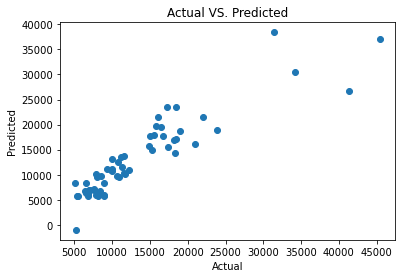

In [43]:
# plottting the result of the evaluation to view correlation

plt.figure 
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS. Predicted')

In [44]:
#running the regression model on the intial data 

pred_y_df=pd.DataFrame({'Actual Values':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Values,Predicted Value,Difference
0,6795.0,6232.948068,562.051932
1,15750.0,19810.202854,-4060.202854
2,15250.0,14890.441648,359.558352
3,5151.0,-1011.461871,6162.461871
4,9995.0,11119.664572,-1124.664572
5,11199.0,13588.850958,-2389.850958
6,5389.0,5776.140758,-387.140758
7,7898.0,5979.482312,1918.517688
8,17199.0,23436.105257,-6237.105257
9,6529.0,8262.198376,-1733.198376
